In [1]:
from rescaleforvis import rescale_for_vis

#how to use
data = [0,-5,10,100.1]
rescale_for_vis(data)

array([1., 0., 2., 4.])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#import all the functions
from rescaleforvis import rescale_for_vis, verify_order, mediate, normalize

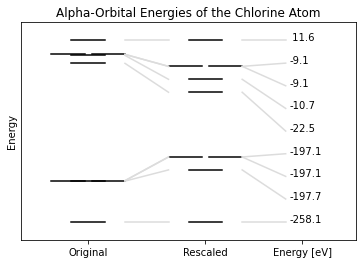

In [7]:
def use_once():
    """demenstrate the a simple use case of the program"""
    values = np.array([#-2762.89579035, #prettier without this
      -258.13737564,  -197.72654978,  -197.08438831,
        -197.08438831,   -22.47369243,   -10.65029121,    -9.11878003,
          -9.11878003,    11.57351908 ])    #alpha Cl orbitals

    values.sort()
    original = values.copy()
    #treat small differences as zero difference
    for i in range(1,len(values)):
        if values[i] - values[i-1] < 0.001:
            values[i] = values[i-1]  
  
    #here is the action
    levels = rescale_for_vis(values)  # <-------------------------------------------

    fig, ax = plt.subplots()

    #take care of doubly degenerate orbitals
    left_right = []
    for i in range(len(levels)):
        if i == 0 or i == len(levels)-1:
            left_right.append("middle")
            continue
        if levels[i+1] == levels[i]:
            left_right.append("left")
        elif levels[i-1] == levels[i]:
            left_right.append("right")
        else:
            left_right.append("middle")

    #plot the original values
    values -= values[0]
    values /= values[-1]
    for n, s in zip(values, left_right):
        if s == "middle":
            ax.plot([0.15,0.25],[n]*2, color="black")
        elif s == "left":
            ax.plot([0.09,0.19],[n]*2, color="black")
        elif s == "right":
            ax.plot([0.21,0.31],[n]*2, color="black")

    #plot the rescaled values
    levels -= levels[0]
    levels /= levels[-1]
    for n, s in zip(levels, left_right):
        if s == "middle":
            ax.plot([0.5,0.6],[n]*2, color="black")
        elif s == "left":
            ax.plot([0.44,0.54],[n]*2, color="black")
        elif s == "right":
            ax.plot([0.56,0.66],[n]*2, color="black")

    #plot the left connecting lines
    for n, l in zip(values, levels):
        plt.plot([0.31,0.44],[n,l],"gainsboro")
    
    #plot the right lines and numbers
    even = np.linspace(0,1,len(levels))
    for o, l, e in zip(original, levels, even):
        if s == "middle" or s == "left":
            ax.annotate(f"{o: .1f}",  xy=(0.76, l), xytext=(0.8, e))
            plt.plot([0.66,0.79],[l,e],"gainsboro")
            
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([0,1])
    ax.set_yticks([])
    ax.set_xticks([0.2,0.55,0.84])
    ax.set_xticklabels(["Original","Rescaled","Energy [eV]"])
    ax.set_title("Alpha-Orbital Energies of the Chlorine Atom")
    ax.set_ylabel("Energy")
    plt.show()
    
use_once()

The order of the magnitudes of the differences between energy levels is strictly preserved:
True True True True False 

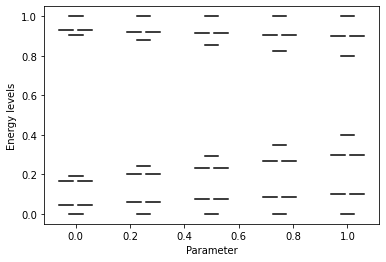

In [13]:
def vary_rescaling_parameter():
    """This demonstrates, How the energy levels change distances, 
    when the parameter for mediation is varied."""
    values = np.array([1,3,3,8,8,9,39,40,40,43],dtype=float) 
    #take care of doubly degenerate orbitals
    left_right = []
    for i in range(len(values)):
        if i == 0 or i == len(values)-1:
            left_right.append("middle")
            continue
        if values[i+1] == values[i]:
            left_right.append("left")
        elif values[i-1] == values[i]:
            left_right.append("right")
        else:
            left_right.append("middle")

    fig, ax = plt.subplots()

    print("The order of the magnitudes of the differences between "
          + "energy levels is strictly preserved:")
    for parameter in np.linspace(0,1,5):
        values -= values.min()
        values /= values.max()

        levels = rescale_for_vis(values) # <-------------------------------------------------
        levels -= levels.min()
        levels /= levels.max()

        #use the two helper functions
        # mediate and verify_order
        levels = mediate(values,levels,parameter) # <----------------------------------------
        print(verify_order(values,levels), end = " ") # <------------------------------------

        #plot
        for n, s in zip(levels, left_right):
            if s == "middle":
                ax.plot([parameter-0.025,parameter+0.025],[n]*2, color="black")
            elif s == "left":
                ax.plot([parameter-0.06,parameter-0.01],[n]*2, color="black")
            elif s == "right":
                ax.plot([parameter+0.01,parameter+0.06],[n]*2, color="black") 

    ax.set_xlabel("Parameter")
    ax.set_ylabel("Energy levels")
    plt.show(fig)
    
vary_rescaling_parameter()
#Also note, that order is preserved, except for the limiting case where the parameter == 1.0

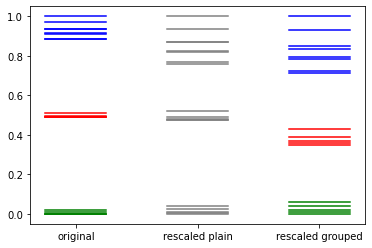

In [4]:
def multi_use():
    """group the values by passing a list of lists to rescale_for_vis"""

    data = [
        [-300.,-299,-298,-289,-279],
        [198,199,200,205,220],
        [600,603,630,632,653,655,690,720],
        ]

    colors = ["green","red","blue","orange","purple"]
    data = normalize(data) 

    for levels, color in zip(data,colors):
        for level in levels:
            plt.plot([0+1/12,1/3-1/12],[level,level],color=color)
    ######################################################

    flatdata = []
    for row in data:
        for value in row:
            flatdata.append(value)
    
    flatdata = rescale_for_vis(flatdata)
    flatdata -= flatdata.min()
    flatdata /= flatdata.max()
    for level in flatdata:
        plt.plot([1/3+1/12,2/3-1/12],[level,level],color="gray")
    ######################################################

    data = rescale_for_vis(data) # <------------------------------------------------------
    data = normalize(data)

    for levels, color in zip(data,colors):
        for level in levels:
            plt.plot([2/3+1/12,1-1/12],[level,level],color=color)

    ax = plt.gca()
    ax.set_xticks([1/6,1/2,5/6])
    ax.set_xticklabels(["original","rescaled plain", "rescaled grouped"])
    plt.show()

multi_use()

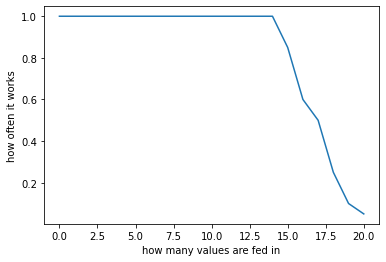

In [12]:
def test_usefulness():
    """if the lists are too big, rescale_for_vis struggles with numerical issues"""
    portions = []
    n_tries = 20
    lengths = np.arange(0,21)
    for i in lengths:
        tries = np.zeros(n_tries)
        for i_try in range(n_tries):
            values = np.random.uniform(0,1,i)
            try:
                rescale_for_vis(values) # <------------------------------------------------
                tries[i_try] = 1
            except RuntimeError:
                pass
        portion_worked = tries.mean()
        portions.append(portion_worked)
    plt.plot(lengths,portions)
    plt.ylabel("how often it works")
    plt.xlabel("how many values are fed in")
    plt.show()
    
test_usefulness()